<img src = "human-heart-design.jpg">

# Importing Libraires

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf


from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score ,roc_curve , f1_score , accuracy_score, precision_score , recall_score , confusion_matrix , classification_report

from tensorflow.keras.models import Sequential , clone_model , load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.layers import Dense , Dropout
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint
from tensorflow.keras.utils import plot_model

from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings(action = "ignore")
plt.rcParams["figure.figsize"] = (12,8)
pd.set_option("display.max_columns" , None)

# Importing Dataset

In [2]:
data = pd.read_csv("heart_2020_cleaned.csv")
df = data.copy()
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# Shape of Dataset

In [3]:
print("There are {} columns in the dataset".format(df.shape[1]))
print("There are {} rows in the dataset".format(df.shape[0]))

There are 18 columns in the dataset
There are 319795 rows in the dataset


# Variables' Description

* **HeartDisease** - Respondents that have ever reported having coronary heart disease (CHD) or myocardial infarction (MI)
* **BMI** - Body Mass Index (BMI)
* **Smoking** - Have you smoked at least 100 cigarettes in your entire life?
* **Alcohol Drinking** - Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week
* **Storke** - (Ever told) (you had) a stroke?
* **PhysicalHealth** - Now thinking about your physical health, which includes physical illness and injury, for how many days during the past 30
* **MentalHealth** - Thinking about your mental health, for how many days during the past 30 days was your mental health not good?
* **DiffWalking** - Do you have serious difficulty walking or climbing stairs?
* **Sex** - Are you male or female?
* **Age Category** - Fourteen-level age category
* **Race** - Imputed race/ethnicity value
* **Diabetic** - (Ever told) (you had) diabetes?
* **PhysicalActivity** - Adults who reported doing physical activity or exercise during the past 30 days other than their regular job
* **Gen Health** - Would you say that in general your health is..
* **SleepTime** - On average, how many hours of sleep do you get in a 24-hour period?
* **Asthma** - (Ever told) (you had) asthma?
* **KidneyDisease** - Not including kidney stones, bladder infection or incontinence, were you ever told you had kidney disease?
* **SkinCancer** - (Ever told) (you had) skin cancer?

# Checking if there are null values in the dataset or not

In [4]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

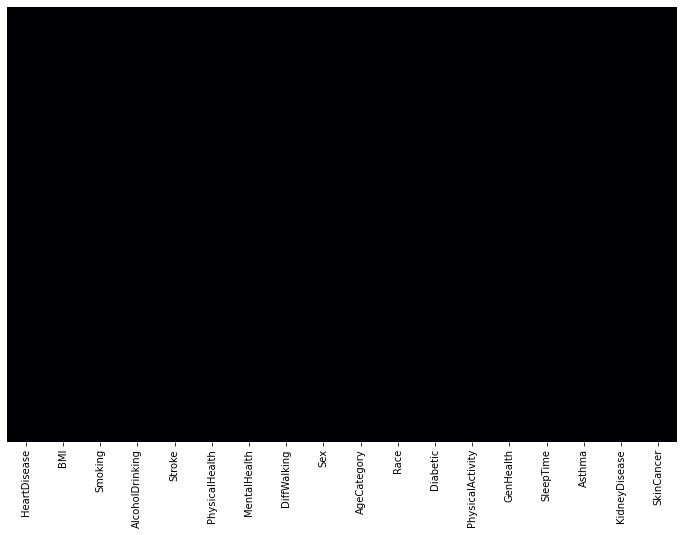

In [5]:
sns.heatmap(data = df.isnull() , cmap = "magma" , cbar = False , yticklabels=False)
plt.show()

# Checking if there duplicates in the dataset or not

In [6]:
print("Before there are {} duplicates in the dataset".format(df.duplicated().sum()))
df.drop_duplicates(inplace = True)
print("Now there are {} duplicates in the dataset".format(df.duplicated().sum()))

Before there are 18078 duplicates in the dataset
Now there are 0 duplicates in the dataset


In [7]:
df["Diabetic"].unique()

array(['Yes', 'No', 'No, borderline diabetes', 'Yes (during pregnancy)'],
      dtype=object)

# Applying manual Encoding

In [8]:
# Converting Yes and No to 1 and 0
cols = [x for x in df.select_dtypes(exclude="number").columns.to_list() if x not in ["Sex" , "AgeCategory" , "Race" , "GenHealth" , "Diabetic"] ]
for x in cols : 
    df[x] = df[x].map({"No" : 0 , "Yes" : 1})

In [9]:
df["Sex"] = df["Sex"].map({"Female" : 0 , "Male" : 1})
df["Race"] = df["Race"].map({"White" : 0 , "Black" : 1 , "Asian" : 2 , "American Indian/Alaskan Native" : 3 , "Other" : 4 , "Hispanic" : 5})
df["GenHealth"] = df["GenHealth"].map({"Poor" : 0 , "Fair" : 1 , "Good" : 2 , "Very good" : 3 , "Excellent" : 4})
df["AgeCategory"] = df["AgeCategory"].map({"18-24" : 0 , "25-29" : 1 , "30-34" : 2 , "35-39" : 3 , "40-44" : 4 , "45-49" : 5,
                                          "50-54" : 6 , "55-59" : 7 , "60-64" : 8 , "65-69" : 9 , "70-74" : 10 , "75-79" : 11 , "80 or older" : 12})
df["Diabetic"] = df["Diabetic"].map({"No" : 0 , "Yes" : 1 , "No, borderline diabetes" : 2 , "Yes (during pregnancy)" : 3})
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,7,0,1,1,3,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,12,0,0,1,3,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,9,0,1,1,1,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,11,0,0,0,2,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,4,0,0,1,3,8.0,0,0,0


# The Percentage of Heart Disease by Gender

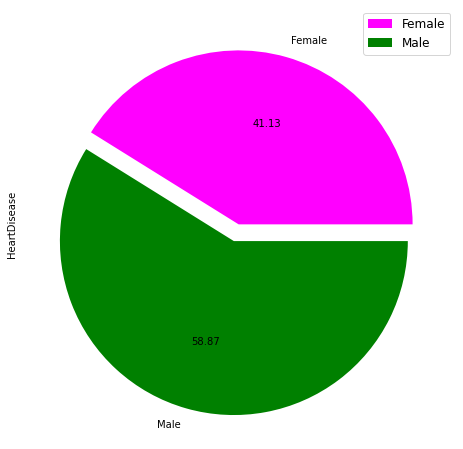

In [10]:
df.groupby(by = "Sex")["HeartDisease"].sum().plot(kind = "pie" , explode = [0.0 , 0.1] , autopct = "%.2f" , 
                                                  colors = ["magenta" , "green"] , labels = ["Female" , "Male"])
plt.legend(loc= "best" , fontsize = 12)
plt.show()

# Bar chart of Heart Disease by Smoking

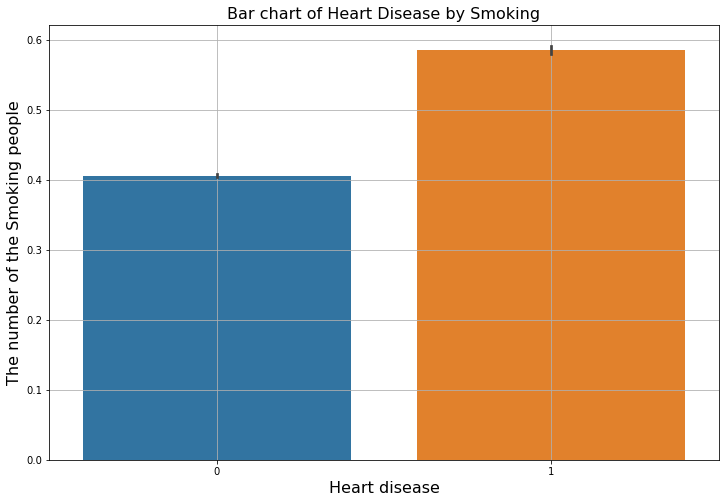

In [11]:
sns.barplot(data = df , x = "HeartDisease" , y = "Smoking")
plt.title("Bar chart of Heart Disease by Smoking" , fontsize = 16)
plt.ylabel("The number of the Smoking people" , fontsize = 16)
plt.xlabel("Heart disease" , fontsize = 16)
plt.grid()
plt.show()

# The Body Mass Index by Sleep Time

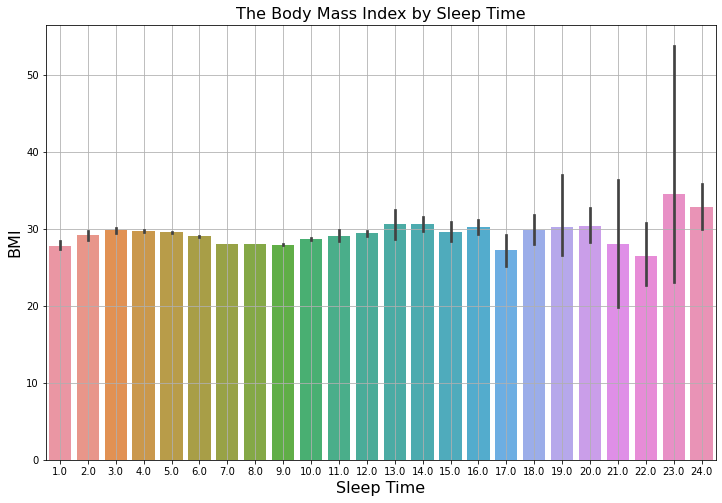

In [12]:
sns.barplot(data = df , y = "BMI" , x = "SleepTime")
plt.title("The Body Mass Index by Sleep Time" , fontsize = 16)
plt.ylabel("BMI" , fontsize = 16)
plt.xlabel("Sleep Time" ,fontsize = 16)
plt.grid()
plt.show()

# Splitting dataset to X and y

In [13]:
X = df.drop(columns = ["HeartDisease"])
y = df["HeartDisease"]

# The Percentage of Dependent variable

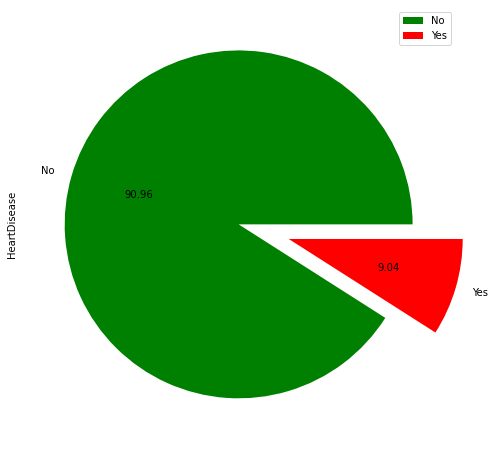

In [14]:
y.value_counts().plot(kind = "pie" , autopct = "%.2f" , explode = [0.0 , 0.3] , labels = ["No" , "Yes"] , colors = ["green" , "red"])
plt.legend(loc = "best")
plt.show()

# Applying Over sampling method

In [15]:
over_sampling = ADASYN(sampling_strategy=0.95 , random_state=42)
X_res , y_res = over_sampling.fit_resample(X , y)

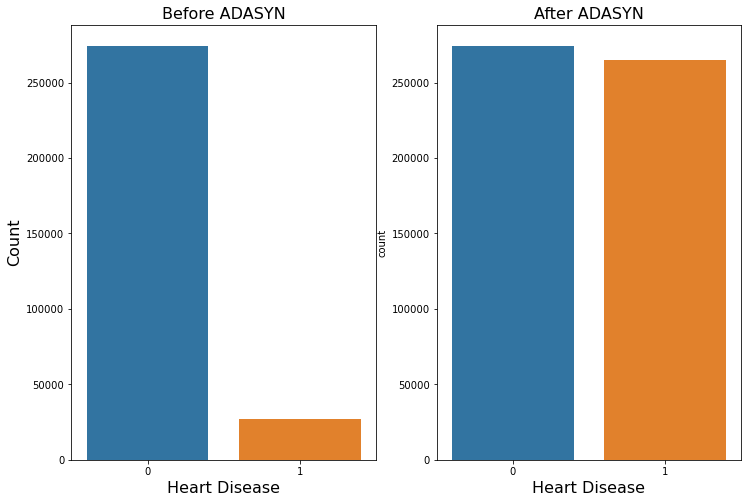

In [16]:
plt.subplot(1,2,1)
sns.countplot(data = pd.DataFrame(y) , x = y)
plt.title("Before ADASYN" , fontsize = 16)
plt.ylabel("Count" , fontsize = 16)
plt.xlabel("Heart Disease" , fontsize = 16)

plt.subplot(1,2,2)
sns.countplot(data = pd.DataFrame(y_res) , x = y_res)
plt.title("After ADASYN" , fontsize = 16)
plt.xlabel("Heart Disease" , fontsize = 16)
plt.show()

In [17]:
X ,y = X_res , y_res

# Shape of the Dataset

In [18]:
print("There are {} columns and {} rows in the dataset".format(df.shape[1] , X.shape[0]))

There are 18 columns and 539338 rows in the dataset


# Splitting Dataset to train and test sets

In [19]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.01 , random_state=42)

# Applying Standart Scaler

In [20]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Converting train and test sets to tensors

In [21]:
X_train_tf = tf.data.Dataset.from_tensor_slices(tensors = X_train)
X_test_tf = tf.data.Dataset.from_tensor_slices(tensors = X_test)

y_train_tf = tf.data.Dataset.from_tensor_slices(tensors = y_train)
y_test_tf = tf.data.Dataset.from_tensor_slices(tensors = y_test)

# Combining train and test sets

In [22]:
train_ziped = tf.data.Dataset.zip(datasets=(X_train_tf , y_train_tf))
test_zipped = tf.data.Dataset.zip(datasets=(X_test_tf , y_test_tf))

# Defining Batch size

In [23]:
train_set = train_ziped.batch(batch_size=100).prefetch(tf.data.AUTOTUNE)
test_set = test_zipped.batch(batch_size=100).prefetch(tf.data.AUTOTUNE)

# Creating callbacks with the help of the function

In [24]:
def callbacks_function(model_path , verbosity = 1) : 
    early = EarlyStopping(monitor = "val_loss" , patience = 50 , verbose=verbosity , restore_best_weights=True)
    check = ModelCheckpoint(filepath=model_path , monitor = "val_loss" , verbose = verbosity , save_best_only=True)
    
    callbacks = [early , check]
    
    return callbacks

# Creating the Neural Network model

In [25]:
model_main = Sequential(layers =[
    Dense(units=128 , activation="relu"),
    Dense(units=128 , activation="relu"),
    Dense(units=128 , activation="relu"),
    Dense(units=128 , activation="relu"),
    Dense(units=128 , activation="relu"),
    Dense(units=128 , activation="relu"),
    Dense(units = 128 , activation="relu"),
    Dense(units = 256 , activation="relu"),
    Dense(units = 256 , activation="relu"),
    Dense(units = 256 , activation="relu"),
    Dense(units = 256 , activation="relu"),
    Dense(units = 256 , activation="relu"),
    Dropout(rate = 0.2 , seed = 42),
    Dense(units = 512 , activation="relu"),
    Dropout(rate = 0.2 , seed = 42),
    Dense(units = 1 , activation="sigmoid")
] , name = "Deep_Learning")

model_main.compile(optimizer=Adam() , loss=BinaryCrossentropy() , metrics=["accuracy"])

model_training = model_main.fit(train_set , 
                validation_data=test_set, callbacks=callbacks_function(model_path=f"{model_main.name}.h5"), verbose=1 , epochs = 500)

Epoch 1/500
5336/5340 [============================>.] - ETA: 0s - loss: 0.4941 - accuracy: 0.7624
Epoch 1: val_loss improved from inf to 0.49059, saving model to Deep_Learning.h5
5340/5340 [==============================] - 35s 6ms/step - loss: 0.4941 - accuracy: 0.7624 - val_loss: 0.4906 - val_accuracy: 0.7616
Epoch 2/500
5332/5340 [============================>.] - ETA: 0s - loss: 0.4819 - accuracy: 0.7705
Epoch 2: val_loss improved from 0.49059 to 0.48471, saving model to Deep_Learning.h5
5340/5340 [==============================] - 37s 7ms/step - loss: 0.4819 - accuracy: 0.7705 - val_loss: 0.4847 - val_accuracy: 0.7655
Epoch 3/500
5336/5340 [============================>.] - ETA: 0s - loss: 0.4764 - accuracy: 0.7737
Epoch 3: val_loss improved from 0.48471 to 0.47948, saving model to Deep_Learning.h5
5340/5340 [==============================] - 42s 8ms/step - loss: 0.4764 - accuracy: 0.7737 - val_loss: 0.4795 - val_accuracy: 0.7610
Epoch 4/500
5339/5340 [===========================

# The Performance of Model

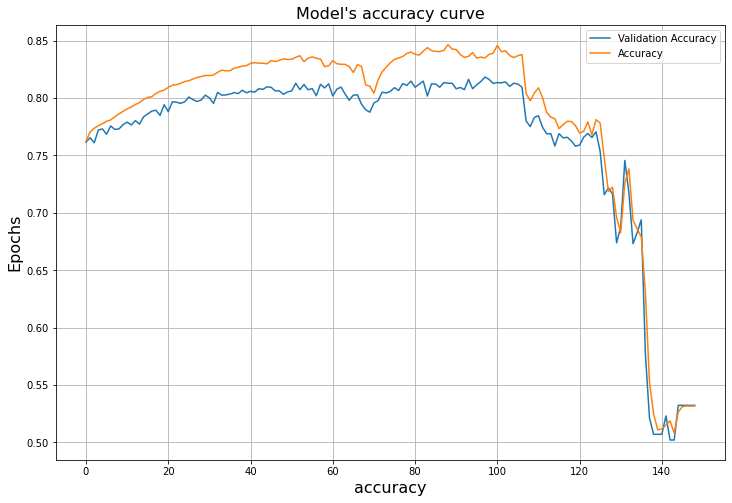

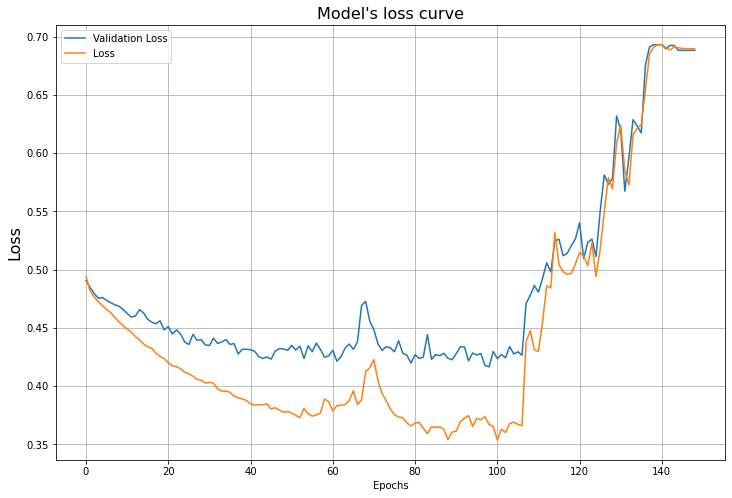

In [26]:
val_accuracy = model_training.history["val_accuracy"]
accuracy = model_training.history["accuracy"]

plt.plot(val_accuracy , label = "Validation Accuracy")
plt.plot(accuracy , label = "Accuracy")
plt.title("Model's accuracy curve" , fontsize = 16)
plt.xlabel("accuracy" , fontsize = 16)
plt.ylabel("Epochs" , fontsize = 16)
plt.grid()
plt.legend(loc = "best")
plt.show()

val_loss = model_training.history["val_loss"]
loss = model_training.history["loss"]

plt.plot(val_loss , label = "Validation Loss")
plt.plot(loss , label = "Loss")
plt.title("Model's loss curve" , fontsize = 16)
plt.ylabel("Loss" , fontsize = 16)
plt.xlabel("Epochs")
plt.grid()
plt.legend(loc = "best")
plt.show()

# Classification Report for ANN model

In [27]:
y_pred = tf.math.round(tf.squeeze(model_main.predict(test_set)))
print(classification_report(y_test , y_pred))

54/54 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2708
           1       0.78      0.87      0.83      2686

    accuracy                           0.82      5394
   macro avg       0.82      0.82      0.82      5394
weighted avg       0.82      0.82      0.82      5394



# Metrics for ANN model

In [28]:
y_pred = tf.math.round(tf.squeeze(model_main.predict(test_set)))

_ , train_score = model_main.evaluate(train_set , verbose=0)
_ , test_score = model_main.evaluate(test_set , verbose = 0)
auc = roc_auc_score(y_test , y_pred)
gini = (2*auc) - 1
f1 = f1_score(y_test , y_pred)
prec = precision_score(y_test , y_pred)
recall = recall_score(y_test , y_pred)

print("The train score is {:.2%}".format(train_score))
print("The test score is {:.2%}".format(test_score))
print("The Roc auc score is {:.2%}".format(auc))
print("The Gini score is {:.2%}".format(gini))
print("The F1 score is {:.2%}".format(f1))
print("The Precission score is {:.2%}".format(prec))
print("The Recall score is {:.2%}".format(recall))

54/54 [==============================] - 0s 4ms/step
The train score is 84.41%
The test score is 81.63%
The Roc auc score is 81.65%
The Gini score is 63.30%
The F1 score is 82.51%
The Precission score is 78.43%
The Recall score is 87.04%


# Confusion Matrices for ANN model

54/54 [==============================] - 0s 4ms/step


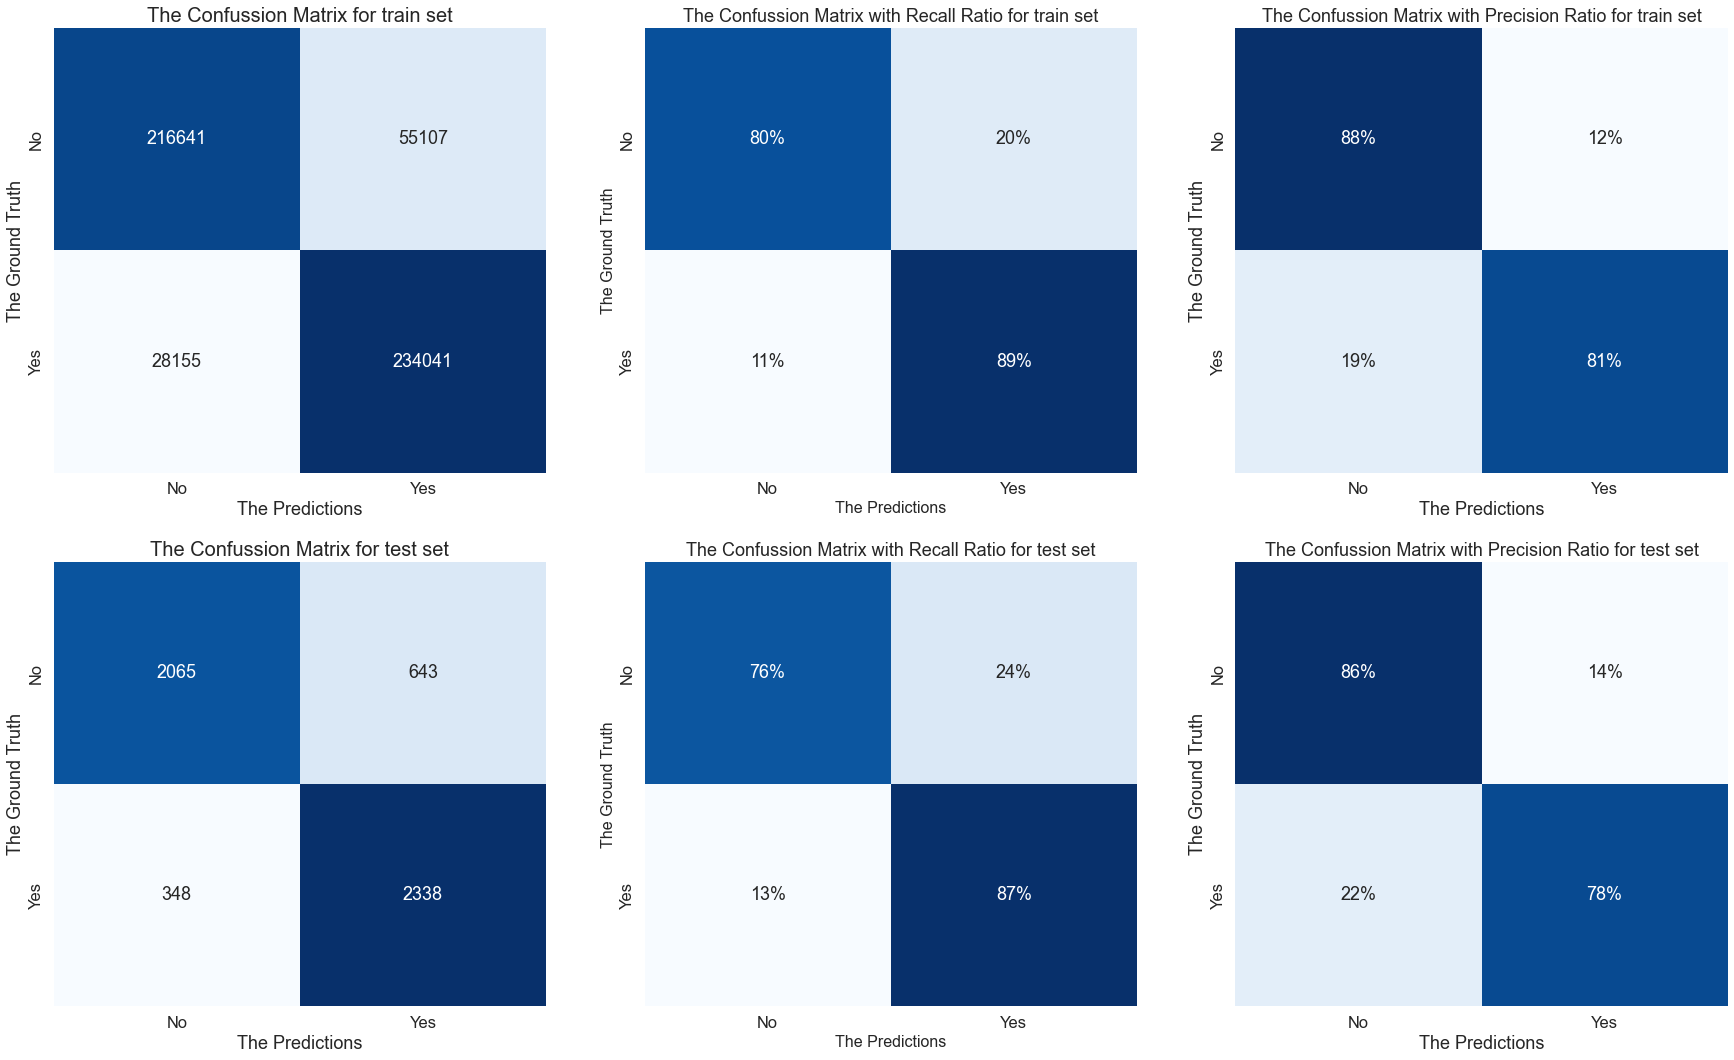

In [29]:
y_pred_train = tf.math.round(tf.squeeze(model_main.predict(train_set)))
y_pred_test = tf.math.round(tf.squeeze(model_main.predict(test_set)))

cm_train = confusion_matrix(y_train , y_pred_train)
cm_test = confusion_matrix(y_test , y_pred_test)

sns.set(font_scale = 1.5, palette = "bright")
plt.figure(figsize = (30,18))

plt.subplot(2,3,1)
sns.heatmap(data = cm_train , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"],
           annot = True , fmt = ".8g")
plt.title("The Confussion Matrix for train set" , fontsize = 20)
plt.ylabel("The Ground Truth" , fontsize = 18)
plt.xlabel("The Predictions" , fontsize = 18)

plt.subplot(2,3,2)
upper_stack = cm_train[0]/np.sum(cm_train , axis = 1)[0]
lower_stack = cm_train[1]/np.sum(cm_train , axis = 1)[1]
result = np.vstack([upper_stack , lower_stack])
sns.heatmap(data = result , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"],
           annot = True , fmt = ".0%")
plt.title("The Confussion Matrix with Recall Ratio for train set" , fontsize = 18)
plt.ylabel("The Ground Truth" , fontsize = 16)
plt.xlabel("The Predictions" , fontsize = 16)

plt.subplot(2,3,3)
left_stack = cm_train[:,0]/np.sum(cm_train , axis = 0)[0]
right_stack = cm_train[:,1]/np.sum(cm_train , axis = 0)[1]
result = np.stack([left_stack , right_stack])
sns.heatmap(data = result , cmap = plt.cm.Blues , cbar = False , yticklabels = ["No" , "Yes"] , xticklabels=["No" , "Yes"],
           annot = True , fmt = ".0%")
plt.title("The Confussion Matrix with Precision Ratio for train set" , fontsize = 18)
plt.xlabel("The Predictions" , fontsize = 18)
plt.ylabel("The Ground Truth" , fontsize = 18)

plt.subplot(2,3,4)
sns.heatmap(data = cm_test , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"],
           annot = True , fmt = ".8g")
plt.title("The Confussion Matrix for test set" , fontsize = 20)
plt.ylabel("The Ground Truth" , fontsize = 18)
plt.xlabel("The Predictions" , fontsize = 18)

plt.subplot(2,3,5)
upper_stack = cm_test[0]/np.sum(cm_test , axis = 1)[0]
lower_stack = cm_test[1]/np.sum(cm_test , axis = 1)[1]
result = np.vstack([upper_stack , lower_stack])
sns.heatmap(data = result , cmap = plt.cm.Blues , cbar = False , yticklabels=["No" , "Yes"] , xticklabels=["No" , "Yes"],
           annot = True , fmt = ".0%")
plt.title("The Confussion Matrix with Recall Ratio for test set" , fontsize = 18)
plt.ylabel("The Ground Truth" , fontsize = 16)
plt.xlabel("The Predictions" , fontsize = 16)

plt.subplot(2,3,6)
left_stack = cm_test[:,0]/np.sum(cm_test , axis = 0)[0]
right_stack = cm_test[:,1]/np.sum(cm_test , axis = 0)[1]
result = np.stack([left_stack , right_stack])
sns.heatmap(data = result , cmap = plt.cm.Blues , cbar = False , yticklabels = ["No" , "Yes"] , xticklabels=["No" , "Yes"],
           annot = True , fmt = ".0%")
plt.title("The Confussion Matrix with Precision Ratio for test set" , fontsize = 18)
plt.xlabel("The Predictions" , fontsize = 18)
plt.ylabel("The Ground Truth" , fontsize = 18)
plt.show()

# Roc Curve for ANN model

54/54 [==============================] - 0s 4ms/step


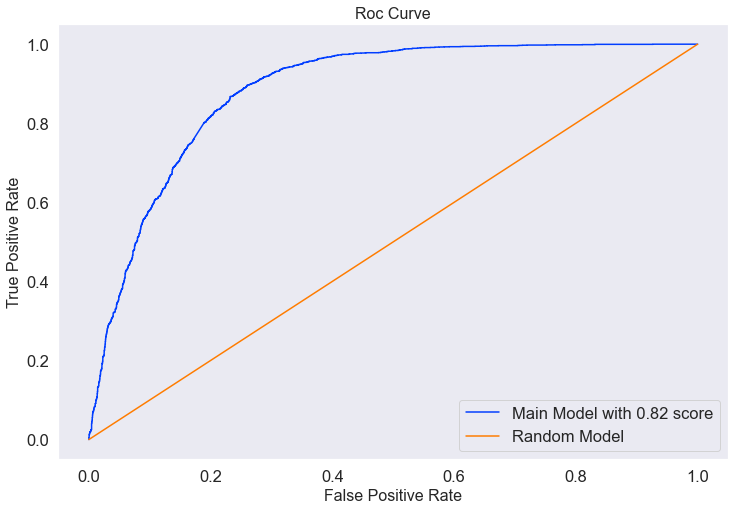

In [30]:
fpr , tpr , _ = roc_curve(y_true = y_test , y_score=tf.squeeze(model_main.predict(test_set)))
plt.plot(fpr , tpr , label = f"Main Model with {np.round(auc , 2)} score")
plt.plot([0,1],[0,1], label = "Random Model")
plt.title("Roc Curve" , fontsize = 16)
plt.ylabel("True Positive Rate" , fontsize = 16)
plt.xlabel("False Positive Rate" , fontsize = 16)
plt.grid()
plt.legend(loc = "best")
plt.show()

In [31]:
import pickle
pickle.dump(sc , open("scaler_deep" , "wb"))